In [11]:
from syllog_model import SyllogPyroModel
model = SyllogPyroModel.from_json(
 '{"a":{"type":"variable","variableType":"LATENT"},"b":{"type":"variable","variableType":"LATENT"},"b=>a":{"type":"factor","inputs":["b"],"outputs":["a"]},"=>b":{"type":"factor","inputs":[],"outputs":["b"]}}'
)

In [12]:
model.get_factor_descriptions()

{'b=>a': {'inputs': ['b'], 'outputs': ['a']},
 '=>b': {'inputs': [], 'outputs': ['b']}}

In [13]:
from torch.distributions import Normal
factors = {
    '=>b': lambda *_: Normal(0, 1).sample(),
    'b=>a': lambda b: Normal(b, 1).sample(),
}

In [14]:
measurements = [model(factors) for i in range(100)] # gotta put in batching

In [15]:
import matplotlib.pyplot as plt

(array([ 2.,  7., 15., 20., 17., 15., 14.,  4.,  4.,  2.]),
 array([-2.1912715 , -1.7221007 , -1.25293   , -0.78375924, -0.3145885 ,
         0.15458226,  0.623753  ,  1.0929238 ,  1.5620946 ,  2.0312653 ,
         2.500436  ], dtype=float32),
 <a list of 10 Patch objects>)

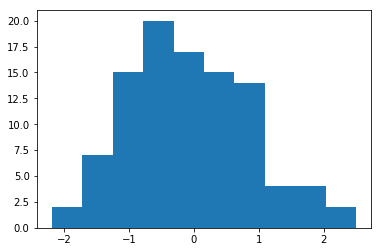

In [16]:
plt.hist(measurements)